In [1]:
%run twisted_graphene.py

In [2]:
g=TwistedBilayerGraphene(1,0)

In [3]:
def t_intra(x1,y1,x2,y2):
    """
    Intralayer hoppings of graphene.
    
    (x1,y1) and (x2,y2) are the initial and final positions, respectively.
    """
    a=2.46 #Angstrom. Lattice constant of graphene
    x=x2-x1
    y=y2-y1
    r=np.sqrt(x**2+y**2)/a
    t=np.zeros_like(r)
    t[(0.3  < r) * (r < 0.8 )] = -2.8922   #1st neighbors = 0.5774
    t[(0.8  < r) * (r < 1.1 )] =  0.2425  #2nd neighbors = 1.0
    t[(1.1  < r) * (r < 1.3 )] = -0.2656  #3rd neighbors = 1.1547
    t[(1.3  < r) * (r < 1.6 )] =  0.0235  #4th neighbors = 1.5275
    t[(1.6  < r) * (r < 1.8 )] =  0.0524  #5th neighbors = 1.7321
    t[(1.8  < r) * (r < 2.05)] = -0.0209  #6th neighbors = 2.0
    t[(2.05 < r) * (r < 2.1 )] = -0.0148  #7th neighbors = 2.0817
    t[(2.1  < r) * (r < 2.35)] = -0.0211  #8th neighbors = 2.3094
    return t


In [4]:
a=2.46
gg={}
for i,cut in zip([1,2,3,4,5,6,7,8],[x*a for x in [0.6,1.05,1.3,1.6,1.9,2.05,2.1,2.4]]):
    gg[i]=TwistedBilayerGraphene(1,0)
    gg[i].calc_hops(cut,t_intra)
    gg[i].set_kpath(gg[i].path_GMKG,[100,100,100])
    gg[i].set_hamiltonian(0.0,0.0)
    gg[i].calc_bands(4,0.0)

gg[2].bands+=0.68
gg[3].bands+=0.68
gg[4].bands+=0.68
gg[5].bands+=0.35
gg[6].bands+=0.35
gg[7].bands+=0.35
gg[8].bands+=0.35

/home/vgmdu/MEGA/Física/Twistrônica/code/twisted_graphene.py:208: RuntimeWarning: invalid value encountered in true_divide
  xx=np.nan_to_num(x/r) #cosseno direcional na direção x
/home/vgmdu/MEGA/Física/Twistrônica/code/twisted_graphene.py:209: RuntimeWarning: invalid value encountered in true_divide
  yy=np.nan_to_num(y/r) #cosseno direcional na direção y


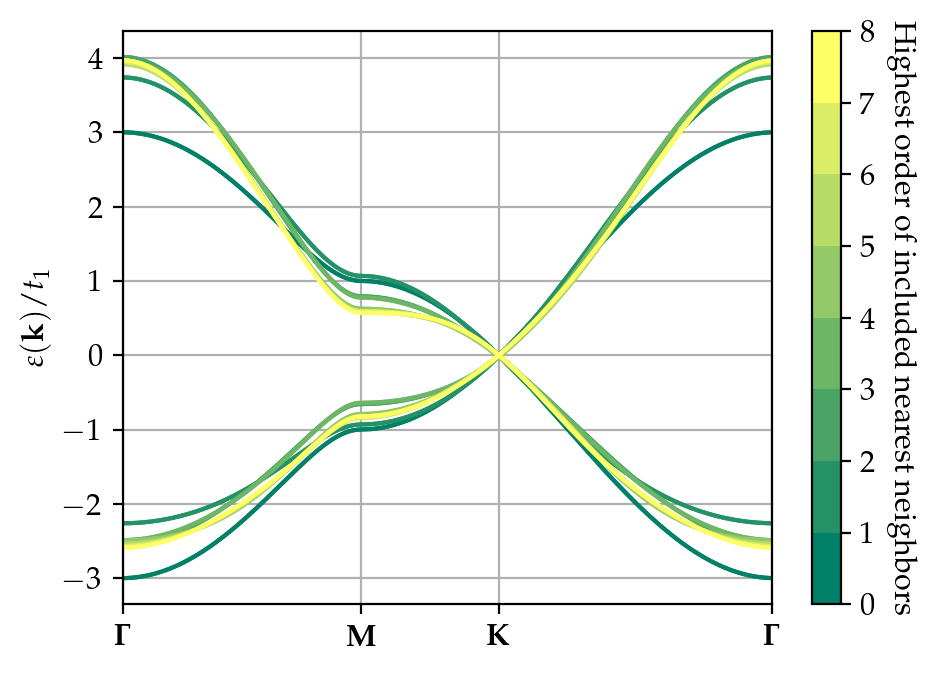

In [8]:
#macaco pra plotar curvas com cor em função de um parâmetro, com colorbar do lado direito
cmap = matplotlib.cm.get_cmap('summer', 8)  # matplotlib color palette name, n colors
colors=[]
for i in range(cmap.N):
    rgb = cmap(i)[:3]  # will return rgba, we take only first 3 so we get rgb
    colors.append(matplotlib.colors.rgb2hex(rgb))
sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=0,vmax=8))
cbar=plt.colorbar(sm)
cbar.set_label('Highest order of included nearest neighbors',rotation=270,labelpad=15)

for i,color in zip([1,2,3,4,5,6,7,8],colors):
    g=gg[i]
    plt.plot(g.ell,g.bands/2.8922,color=color)

plt.grid(True)
plt.xticks(g.ell[g.kticks],['$\mathbf{\Gamma}$','$\mathbf{M}$','$\mathbf{K}$','$\mathbf{\Gamma}$'])
plt.xlim(g.ell[0],g.ell[-1])
plt.ylabel('$\\varepsilon(\mathbf{k})/t_1$')


plt.savefig('Fig11_graphene_monolayer_more_neighbors.svg')

plt.show()